\section{Introduction}
We consider the Hamiltonian
\begin{equation}
H=-\sum_{\sigma}\sum_{\langle{ij}\rangle}t_{ij}(c_{i\sigma}^{\dagger}c_{j\sigma}+h.c.),
\end{equation}
with $t_{ij}=|t|e^{\text{i}\theta_{ij}}$ various kinds of lattices. We assume the translation symmetry can be broken up to 4 unit cell along two different directions.

Suppose there are We can write down the Hamiltonian in the representation $(c_{0}^{\dagger})$

\section{Square lattice}
We label the lattice as $\mathbf{a}_{1}=(4, 0), \mathbf{a}_{2}=(0, 4), \mathbf{r}=r_{1}\mathbf{a}_{1}+r_{2}\mathbf{a}_{2}$, which means within every unit cell there are $16$ sites. Suppose there are $N=N_{1}\times N_{2}$ unit cells.

Then we perform the Fourier transformation
\begin{equation}
c_{\mathbf{r}p}=\frac{1}{\sqrt{N}}\sum_{\mathbf{k}}e^{\text{i}\mathbf{k}\cdot\mathbf{r}}c_{\mathbf{k}p}
\end{equation}

In [3]:
import numpy as np
from numpy import linalg as la

PI = np.pi

# square lattice
N1 = 24
N2 = 24
N = N1*N2

# numFermion = int (N / 4)
numFermion = 128

def HamSquare (phi):
    Ham = np.zeros ((N, N), dtype=complex)
    for i in range (N1):
        for j in range (N2):
            r = j*N1+i
            rx = j*N1+((i+1) % N1)
            ry = ((j+1) % N2)*N1+i
            Ham[r][ry] = -1.0
            Ham[ry][r] = -1.0
            if (0 == j % 2):
                Ham[r][rx] = -1.0*np.exp (1.j*phi)
                Ham[rx][r] = np.conjugate (Ham[r][rx])
            else:
                Ham[r][rx] = -1.0
                Ham[rx][r] = -1.0
    return Ham

def GSEnergy (Ham, nf):
    w, v = la.eigh (Ham)
    ene = 0.0
    for i in range (nf):
        ene += w[i]
    return ene / N

<IPython.core.display.Javascript object>


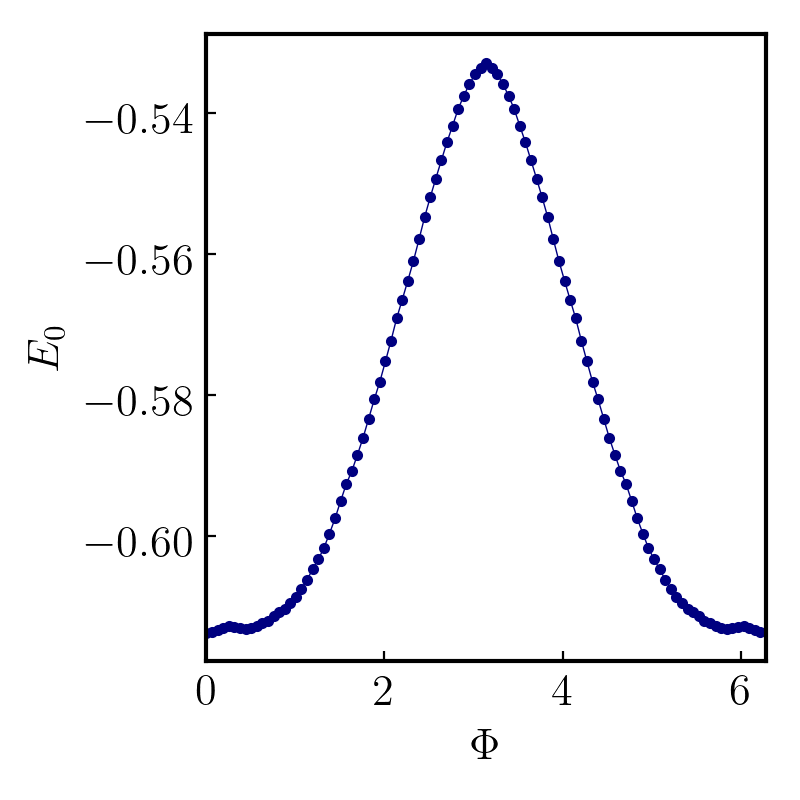

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.patches as patches
import matplotlib.ticker as ticker

%matplotlib notebook

figSquare = plt.figure (figsize=(4, 4))
fsize = 12
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc ('text', usetex=True)
plt.rc ('font', family='serif')

numPlot = 100
x = np.linspace (0.0, 2.0*PI, num=numPlot, endpoint=False)
y = []
for i in range (numPlot):
    y.append (GSEnergy (HamSquare (x[i]), numFermion))

ax0 = figSquare.add_subplot (111)
# ax0.set_title(r'(a)', x=0.1, y=0.1, fontsize=fsize)
ax0.set_xlim (0.0, 2.0*PI)

ax0.plot (x, y, color='navy', linewidth=0.5, marker='.', label='0')

ax0.tick_params (axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel (r'$\Phi$', fontsize=fsize)
ax0.set_ylabel (r'$E_{0}$', fontsize=fsize)

figSquare.tight_layout ()
figSquare.savefig ('free_fermion_square.pdf', format='PDF')

In [51]:
def HamTriangle (arg):
    Ham = np.zeros ((N, N), dtype=complex)
    for i in range (N1):
        for j in range (N2):
            r = j*N1+i
            r1 = j*N1+((i+1) % N1)
            r2 = ((j+1) % N2)*N1+i
            r3 = ((j+1) % N2)*N1+((i+N1-1) % N1)
            Ham[r][r2] = -1.0
            Ham[r2][r] = -1.0
            if (0 == j % 2):
                Ham[r][r1] = -1.0*np.exp (1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r][r3] = -1.0*np.exp (1.j*phi)
                Ham[r3][r] = np.conjugate (Ham[r][r3])
            else:
                Ham[r][r1] = -1.0*np.exp (-1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r][r3] = -1.0*np.exp (-1.j*phi)
                Ham[r3][r] = np.conjugate (Ham[r][r3])
    return Ham

# triangle lattice
N1 = 24
N2 = 24
N = N1*N2

# numFermion = int (N / 4)
numFermion = 128

figTriangle = plt.figure (figsize=(4, 4))
fsize = 12
mpl.rcParams['axes.linewidth'] = 1.5
fsize = 16
plt.rc ('text', usetex=True)
plt.rc ('font', family='serif')

numPlot = 100
x = np.linspace (0.0, 2.0*PI, num=numPlot, endpoint=False)
y = []
for i in range (numPlot):
    y.append (GSEnergy (HamTriangle (x[i]), numFermion))

ax0 = figTriangle.add_subplot (111)
# ax0.set_title(r'(a)', x=0.1, y=0.1, fontsize=fsize)
ax0.set_xlim (0.0, 2.0*PI)

ax0.plot (x, y, color='navy', linewidth=0.5, marker='.', label='0')

ax0.tick_params (axis='both', labelsize=fsize, direction='in')
ax0.set_xlabel (r'$\Phi$', fontsize=fsize)
ax0.set_ylabel (r'$E_{0}$', fontsize=fsize)

figTriangle.tight_layout ()
figTriangle.savefig ('free_fermion_triangle.pdf', format='PDF')

NameError: name 'phi' is not defined

<Figure size 288x288 with 0 Axes>

In [7]:
print (GSEnergy (HamTriangle (0.0), numFermion))
print (GSEnergy (HamTriangle (0.5*PI), numFermion))

-1.0971041150940117
-1.183413305100011


In [8]:
def HamTrianglePIOver2 (phi):
    Ham = np.zeros ((N, N), dtype=complex)
    for i in range (N1):
        k = (i % 2)*2-1
        for j in range (N2):
            r = j*N1+i
            r1 = j*N1+((i+1) % N1)
            r2 = ((j+1) % N2)*N1+i
            r3 = ((j+1) % N2)*N1+((i+N1-1) % N1)
            Ham[r][r2] = -1.0*np.exp (1.j*0.5*PI)
            Ham[r2][r] = np.conjugate (Ham[r][r2])
            if (0 == j % 2):
                Ham[r][r1] = -1.0*np.exp (1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r][r3] = -1.0*np.exp (1.j*0.5*PI)
                Ham[r3][r] = np.conjugate (Ham[r][r3])
            else:
                Ham[r][r1] = -1.0*np.exp (-1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r][r3] = -1.0*np.exp (-1.j*0.5*PI)
                Ham[r3][r] = np.conjugate (Ham[r][r3])
    return Ham

In [9]:
print (GSEnergy (HamTrianglePIOver2 (0.0), numFermion))

-1.2010163267279121


In [57]:
# Assume translational invariant along T1 direction but break translational symmetry along T2 direction.

# triangle lattice
numUC1 = 16
numUC2 = 16
numUC = numUC1*numUC2
numSite = numUC

numFermion = int (numSite / 2)

def HamTriangleUC22 (args):
    Ham = np.zeros ((numSite, numSite), dtype=complex)
    for j in range (numUC2):
        for i in range (numUC1):
            r = j*numUC1+i
            r0 = j*numUC1+((i+1) % numUC1)
            r1 = ((j+1) % numUC2)*numUC1+i
            if (0 == i % 2) and (0 == j % 2):
                Ham[r][r0] = -1.0*np.exp (+1.j*0.5*PI)
                Ham[r0][r] = np.conjugate (Ham[r][r0])
                Ham[r][r1] = -1.0*np.exp (+1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r0][r1] = -1.0*np.exp (args[0]*1.j*0.5*PI)
                Ham[r1][r0] = np.conjugate (Ham[r0][r1])
            elif (1 == i % 2) and (0 == j % 2):
                Ham[r][r0] = -1.0*np.exp (+1.j*0.5*PI)
                Ham[r0][r] = np.conjugate (Ham[r][r0])
                Ham[r][r1] = -1.0*np.exp (args[1]*1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r0][r1] = -1.0*np.exp (args[2]*1.j*0.5*PI)
                Ham[r1][r0] = np.conjugate (Ham[r0][r1])
            elif (0 == i % 2) and (1 == j % 2):
                Ham[r][r0] = -1.0*np.exp (+1.j*0.5*PI)
                Ham[r0][r] = np.conjugate (Ham[r][r0])
                Ham[r][r1] = -1.0*np.exp (+1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r0][r1] = -1.0*np.exp (args[3]*1.j*0.5*PI)
                Ham[r1][r0] = np.conjugate (Ham[r0][r1])
            elif (1 == i % 2) and (1 == j % 2):
                Ham[r][r0] = -1.0*np.exp (args[4]*1.j*0.5*PI)
                Ham[r0][r] = np.conjugate (Ham[r][r0])
                Ham[r][r1] = -1.0*np.exp (args[5]*1.j*0.5*PI)
                Ham[r1][r] = np.conjugate (Ham[r][r1])
                Ham[r0][r1] = -1.0*np.exp (args[6]*1.j*0.5*PI)
                Ham[r1][r0] = np.conjugate (Ham[r0][r1])
    return Ham

def GSEnergy (Ham, nf):
    w, v = la.eigh (Ham)
    ene = 0.0
    for i in range (nf):
        ene += w[i]
    return (ene / numSite)

In [58]:
test0 = [1, 3, 3, 1, 1, 3, 3] # [pi/2, pi/2]
test1 = [0, 3, 2, 0, 1, 3, 2] # [0, \pi]
test2 = [0, 1, 0, 0, 1, 1, 0] # [0, 0]
test3 = [1, 1, 1, 1, 1, 1, 1] # [+\pi/2, -\pi/2]

print (GSEnergy (HamTriangleUC22 (test0), numFermion))
print (GSEnergy (HamTriangleUC22 (test1), numFermion))
print (GSEnergy (HamTriangleUC22 (test2), numFermion))
print (GSEnergy (HamTriangleUC22 (test3), numFermion))



-1.2010163267279121
-1.1834133051000109
-0.9886007357619138
-0.9426261547735965


In [59]:
def ToStr (n, base):
   convertString = "0123456789ABCDEF"
   if n < base:
      return convertString[n]
   else:
      return ToStr (n // base, base) + convertString[n % base]

testStr = ToStr (23, 4)
print (testStr, testStr[2], int (testStr[2]))

numPos = int (np.power (4, 7))
numArgs = 7

ene = []
config = []
for i in range (numPos):
    s = ToStr (i, 4)
    s = s.rjust (numArgs, '0')
    arg = []
    for l in range (numArgs):
        arg.append (int (s[l]))
#     print (i, GSEnergy (HamTriangleUC22 (arg), numFermion))
    ene.append (GSEnergy (HamTriangleUC22 (arg), numFermion))
    config.append (s)
    
print (np.sort (ene))



113 3 3
[-1.20101633 -1.20101633 -1.18341331 ... -0.96935015 -0.94262615
 -0.94262615]


NameError: name 'myList' is not defined

In [75]:
index = sorted (range (len (ene)), key=ene.__getitem__)

for i in range (40):
    print (ene[index[i]], config[index[i]], index[i])



-1.2010163267279124 3313131 15837
-1.2010163267279121 1331133 8031
-1.1834133051000109 0320132 3614
-1.1834133051000109 2302130 11420
-1.1654472038216617 0023121 729
-1.1654472038216617 0310131 3357
-1.1654472038216617 2001123 8283
-1.1654472038216617 2312131 11677
-1.1654472038216614 0221103 2643
-1.1654472038216614 0323131 3805
-1.1654472038216614 0330133 3871
-1.1654472038216614 1030122 4890
-1.1654472038216614 1232100 7056
-1.1654472038216614 1301130 7260
-1.1654472038216614 1321132 7774
-1.1654472038216614 1330132 7966
-1.1654472038216614 1332130 8092
-1.1654472038216614 2203101 10449
-1.1654472038216614 2301133 11359
-1.1654472038216614 2303131 11485
-1.1654472038216614 2332133 12191
-1.1654472038216614 3012120 12696
-1.1654472038216614 3210102 14610
-1.1654472038216614 3303130 15580
-1.1654472038216614 3310132 15646
-1.1654472038216614 3312130 15772
-1.1654472038216614 3323132 16094
-1.1654472038216612 0321133 3679
-1.1592369655407477 0023131 733
-1.1592369655407477 0221133 2655